In [2]:
"""
Get the packages we need to manipulate the dataset 
"""
import numpy as np 
import pandas as pd 
import os 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from tqdm import tqdm
#import seaborn as sns

In [12]:
"""
Specify the directories for data. These are universal for our repository-
this is the only thing you should not change.
"""

#rewrite this in the preferred way using os.join and os.path 

DATA_DIR = './' + 'raw_data'

DATA_NAME = '/CreditCard_data.csv'

"""
The sample Dataset summarizes the usage behavior of about
9000 active credit card holders during the last 6 months
"""

DATA_PATH = DATA_DIR + DATA_NAME

os.listdir(DATA_DIR)

if os.path.isfile(DATA_PATH): 
    print('DATA_PATH is a valid path')
else:
    raise ValueError('DATA_PATH is not valid path')


DATA_PATH is a valid path


## LOAD DATA

In [13]:
"""
Define size of data sample to read-in. Use to_skip to define the logic. 

Import data as pandas dataframe for that format 
"""

SAMPLE_SIZE = 10000

def to_skip(index): 
    """
    Function to be used with pandas skiprows
    """
    keeprow = False
    
    if index <= SAMPLE_SIZE:
        keeprow = True
    else:
        keeprow = False
    
    return keeprow

raw_data = pd.read_csv(DATA_PATH,nrows = SAMPLE_SIZE)
                                              
print('Shape of the data is :', raw_data.shape, '\n')
print('The features of the data:\n', raw_data.columns)

Shape of the data is : (8950, 18) 

The features of the data:
 Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


## INSPECT THE DATASET

In [14]:
"""
Examine a sample of the data
"""
raw_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [8]:
raw_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

NameError: name 'sns' is not defined

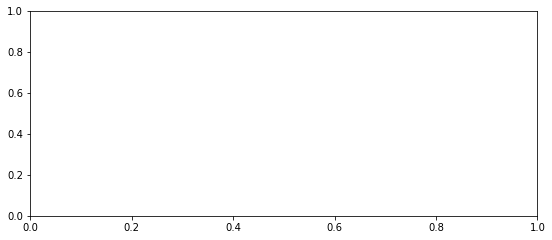

In [15]:
#Plot data 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(20,40)

for i in range(1,18):
    ax = plt.subplot(9,2,i)
    col = raw_data.columns[i]
    sns.distplot(raw_data[col], ax=ax)
    
plt.savefig('all_dist.png')


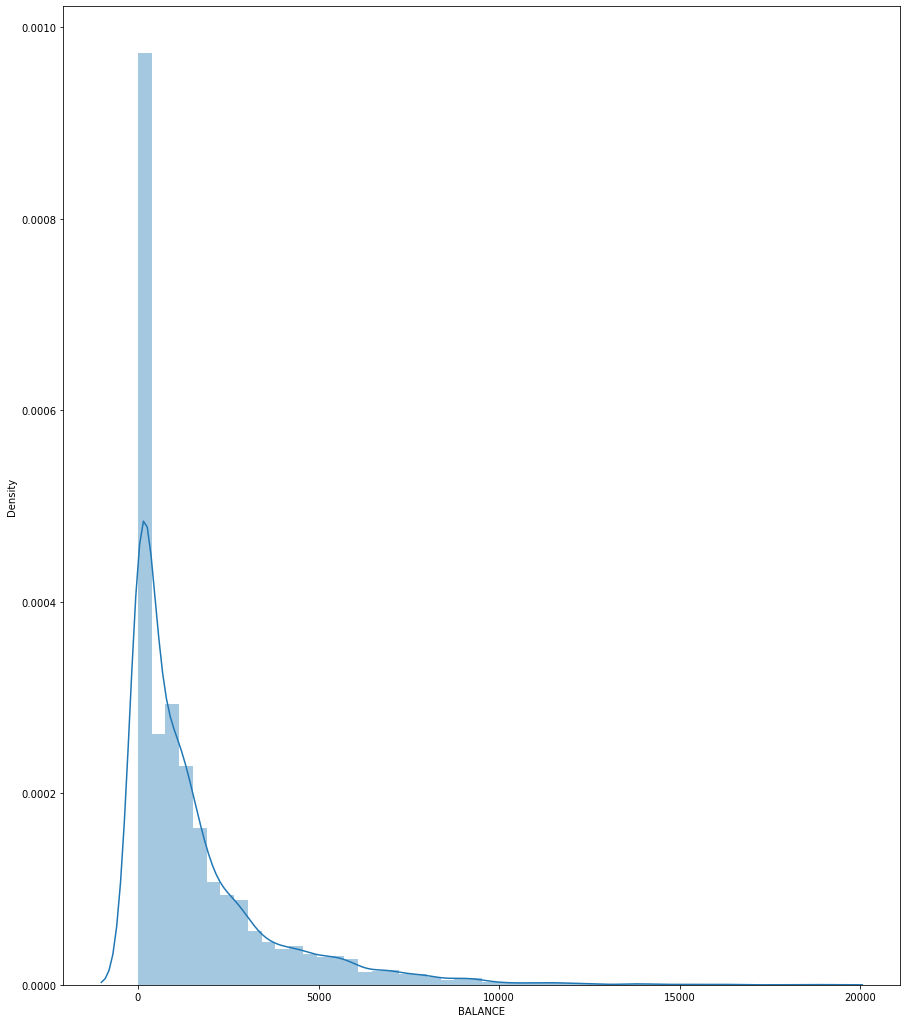

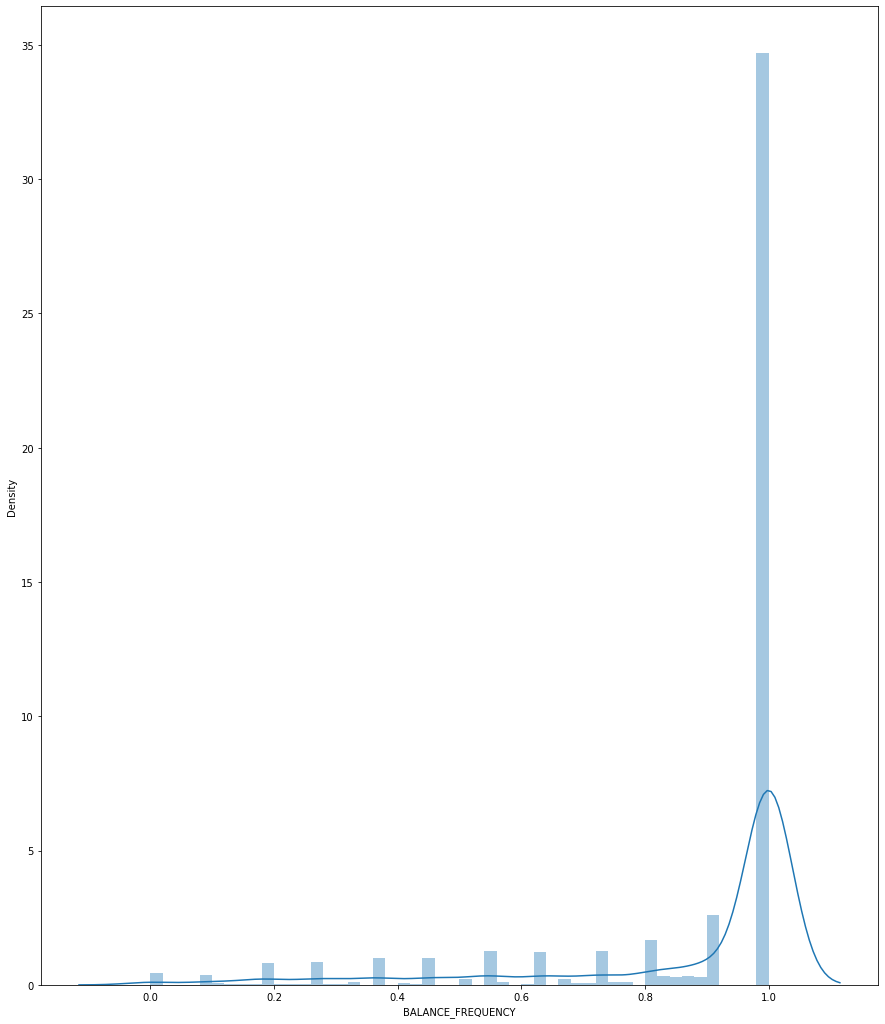

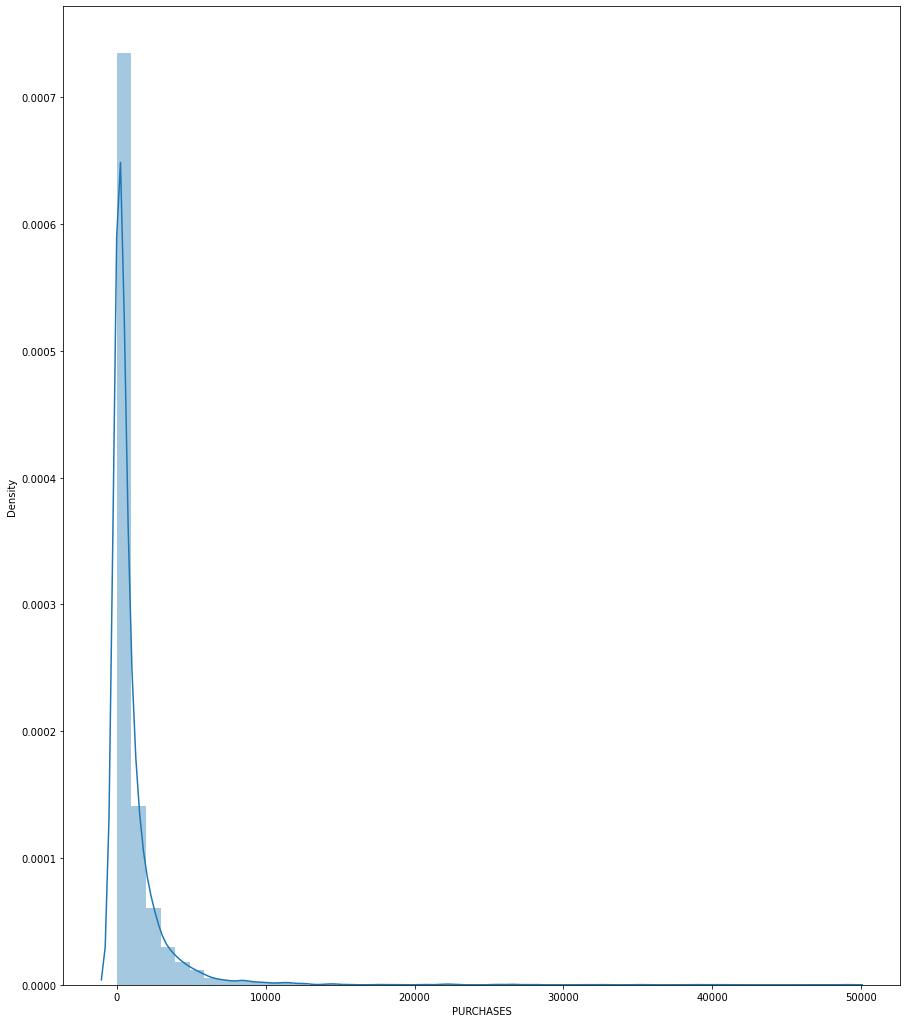

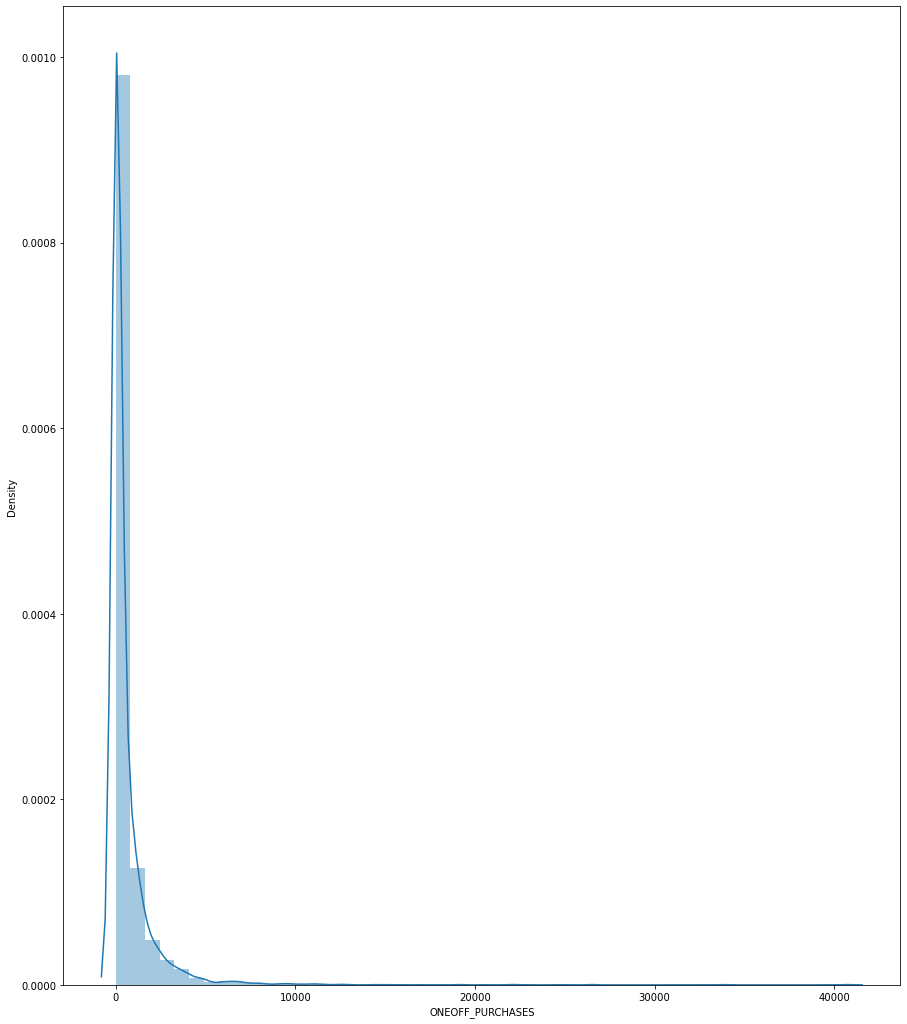

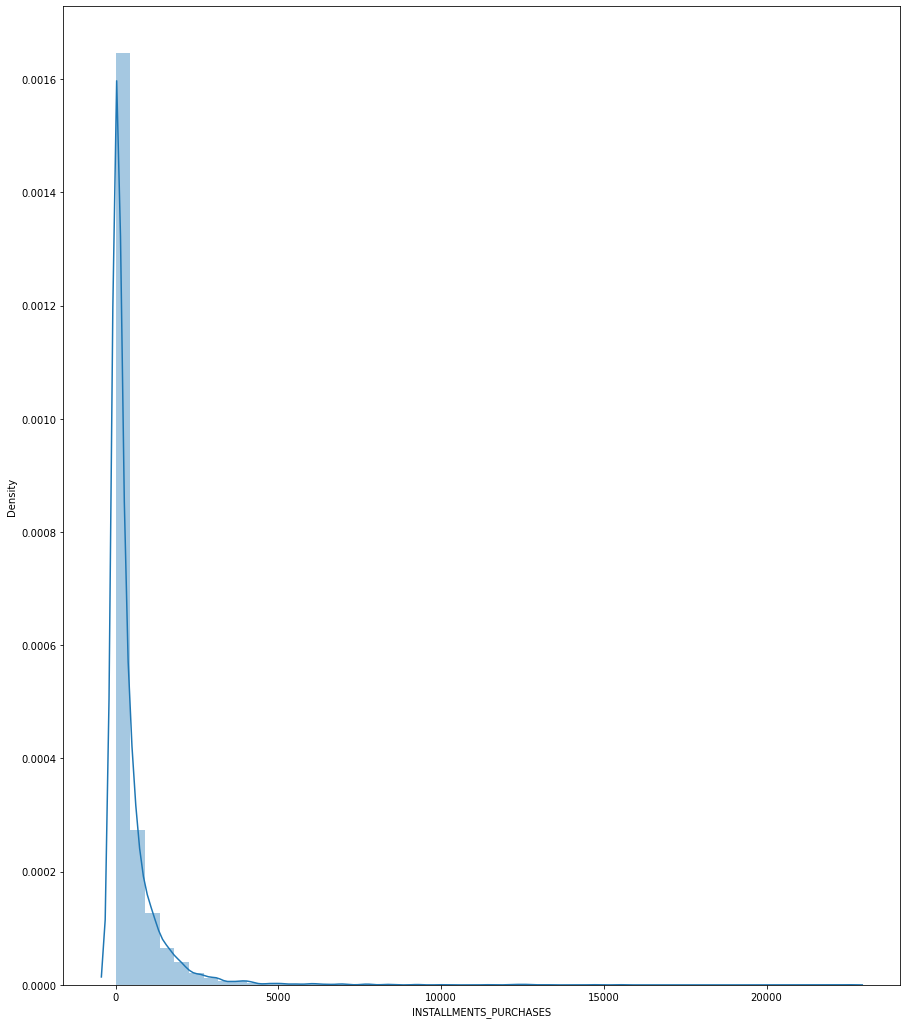

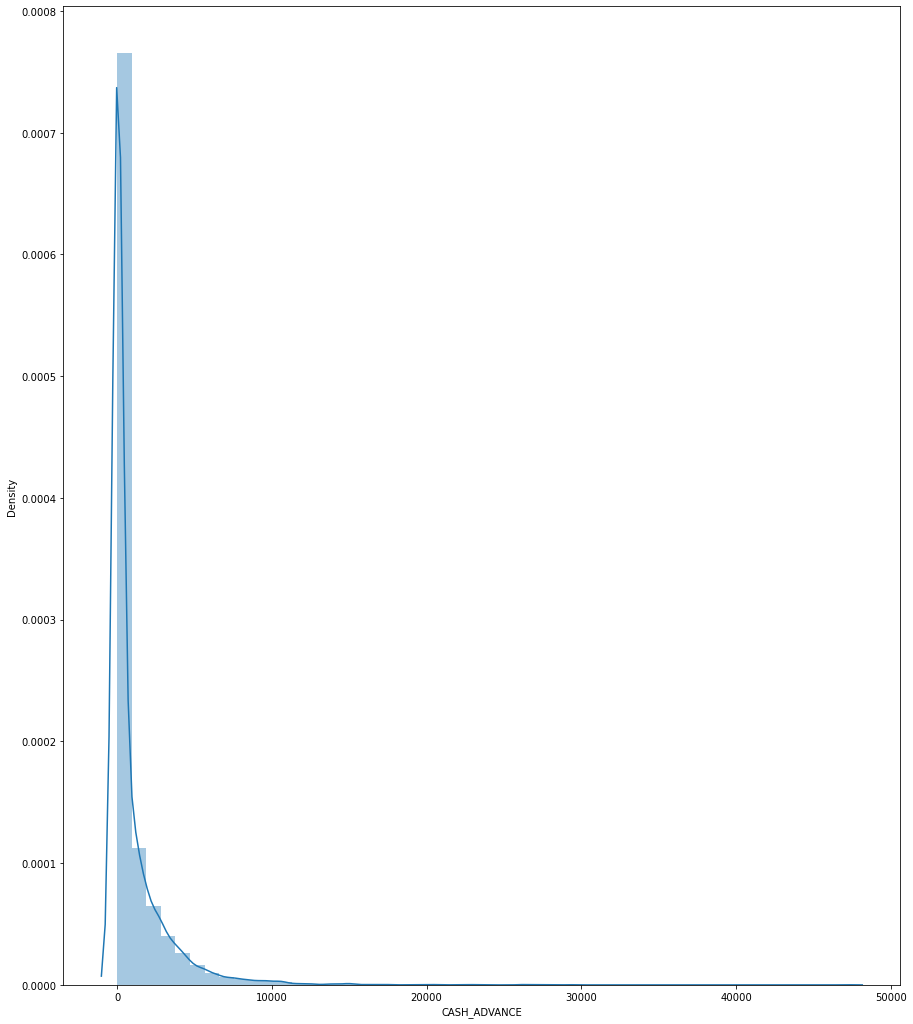

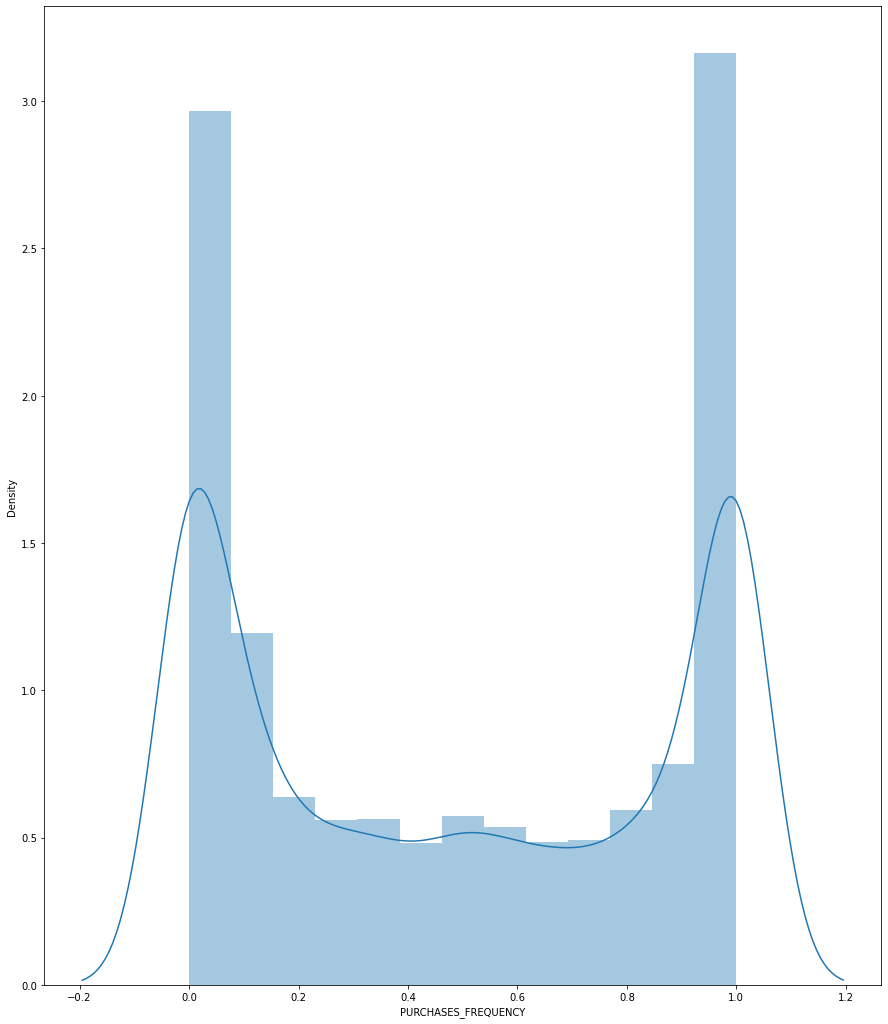

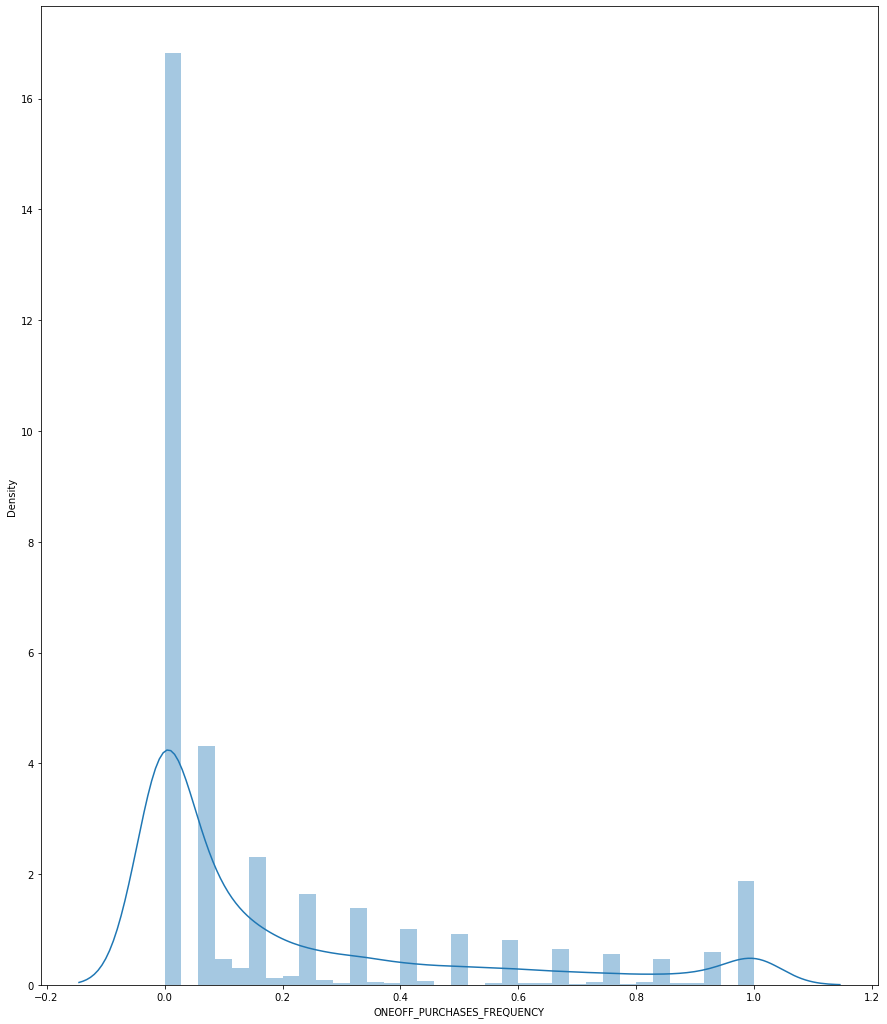

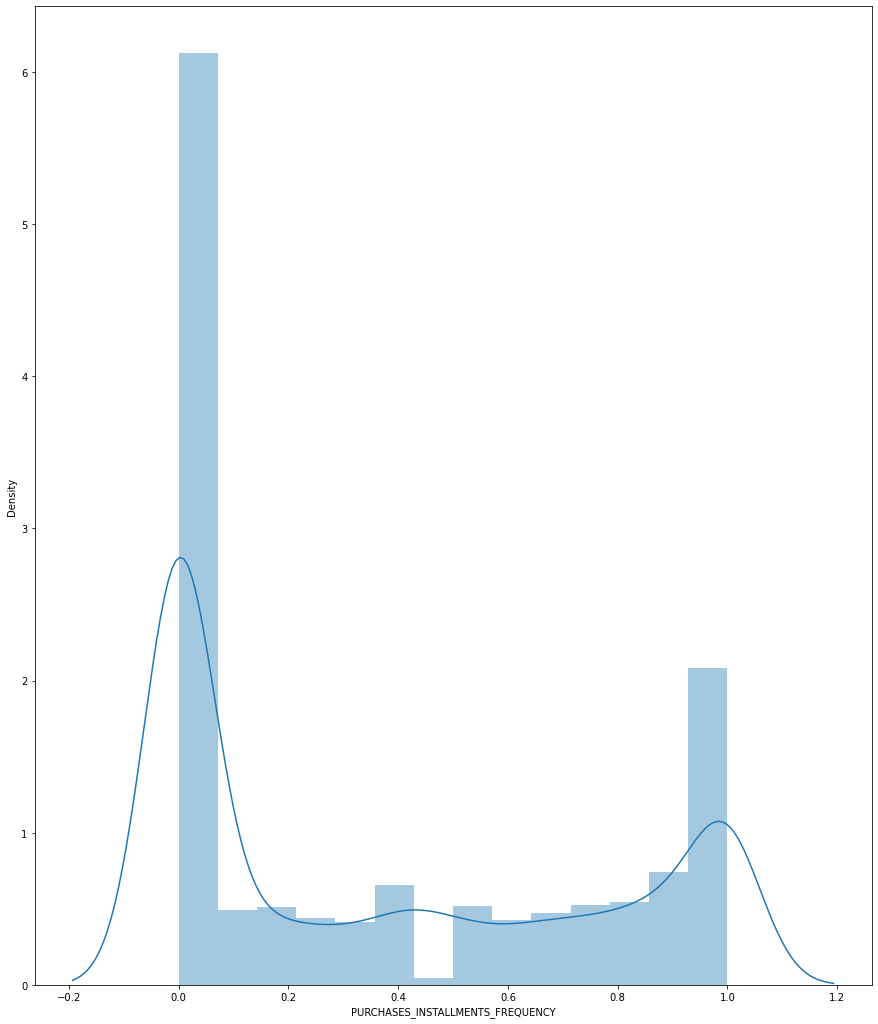

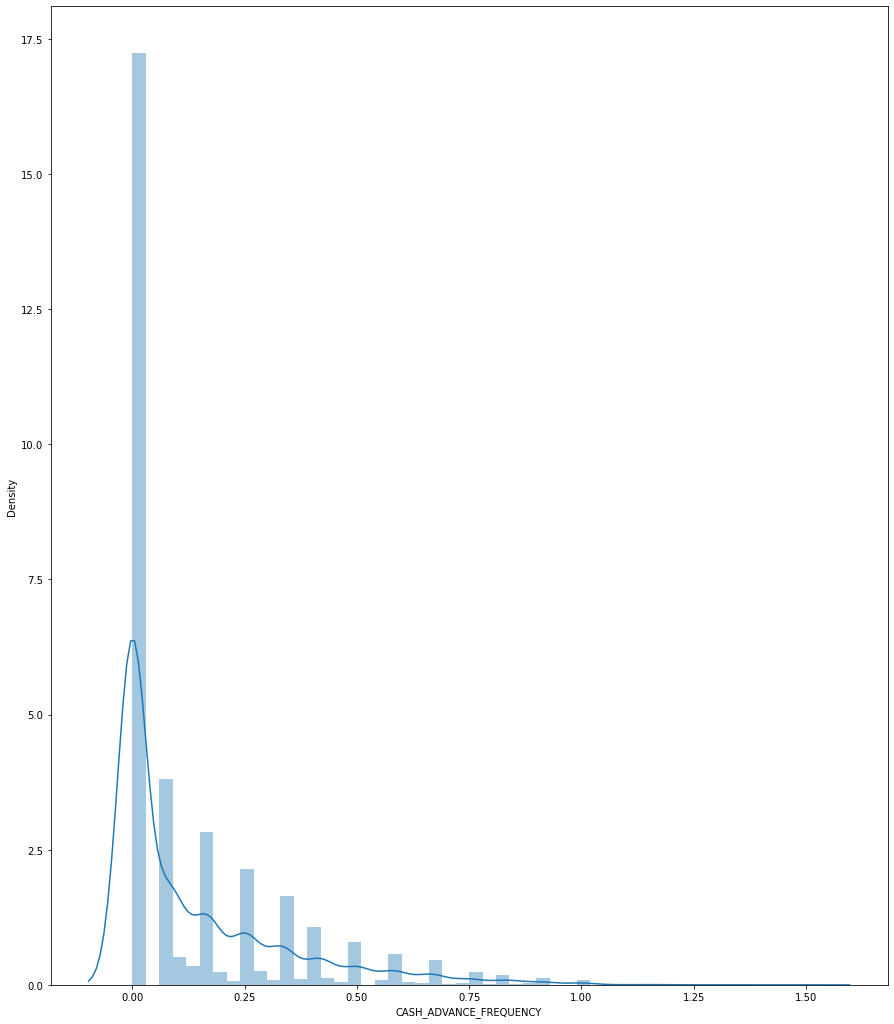

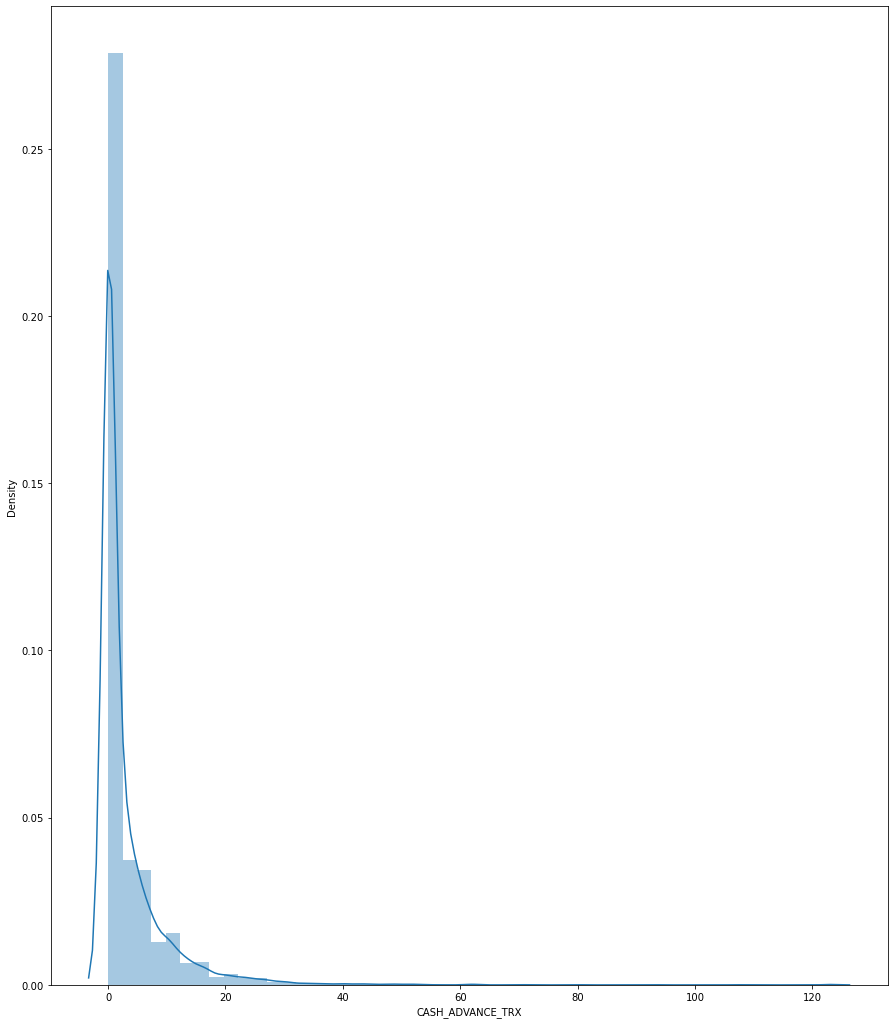

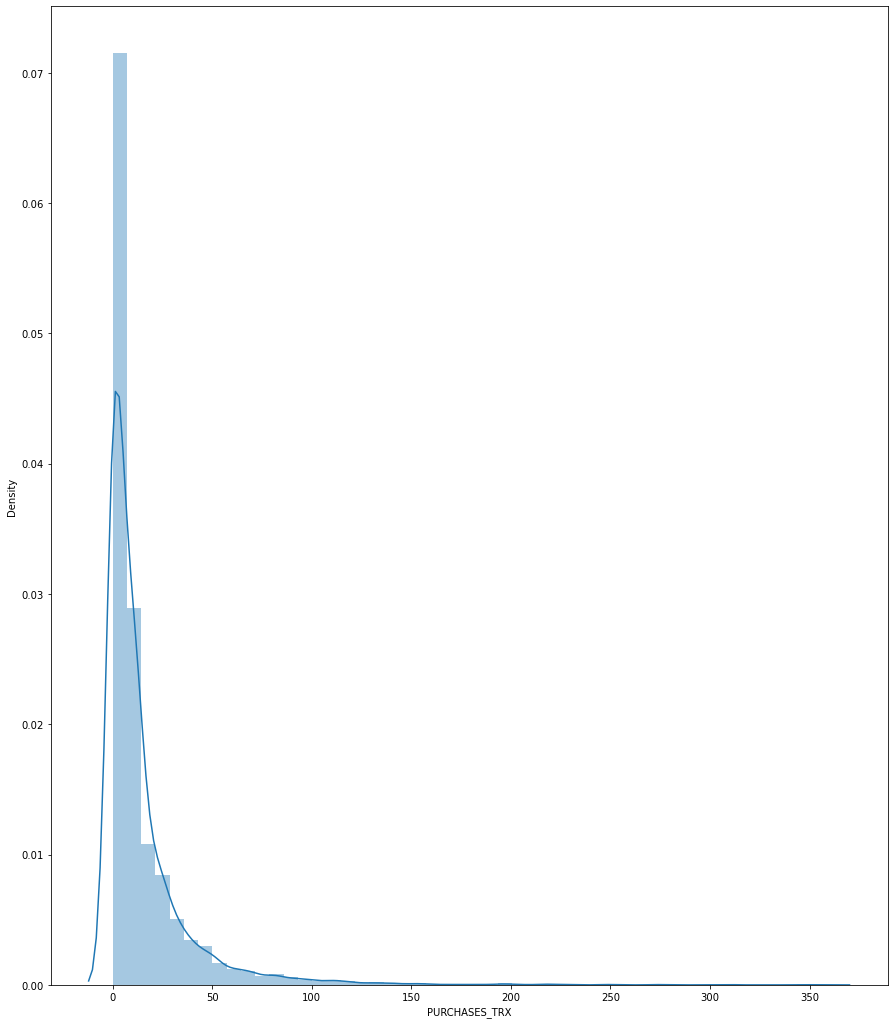

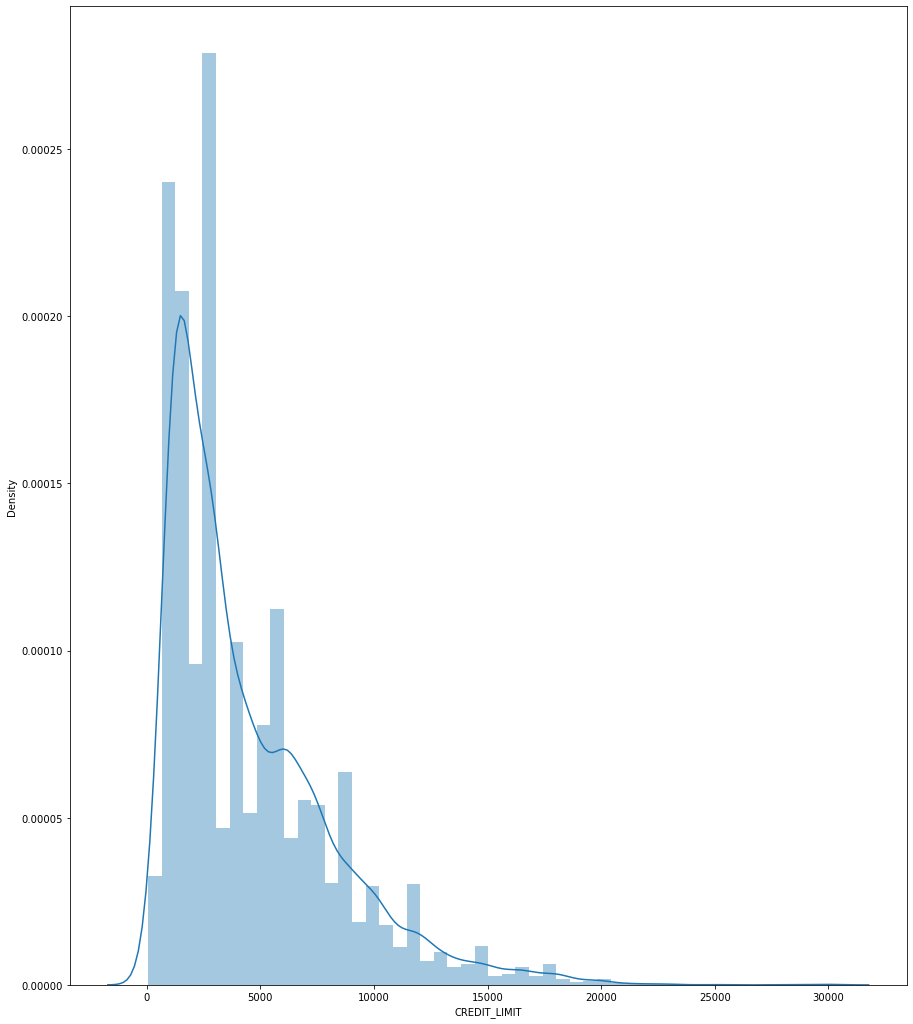

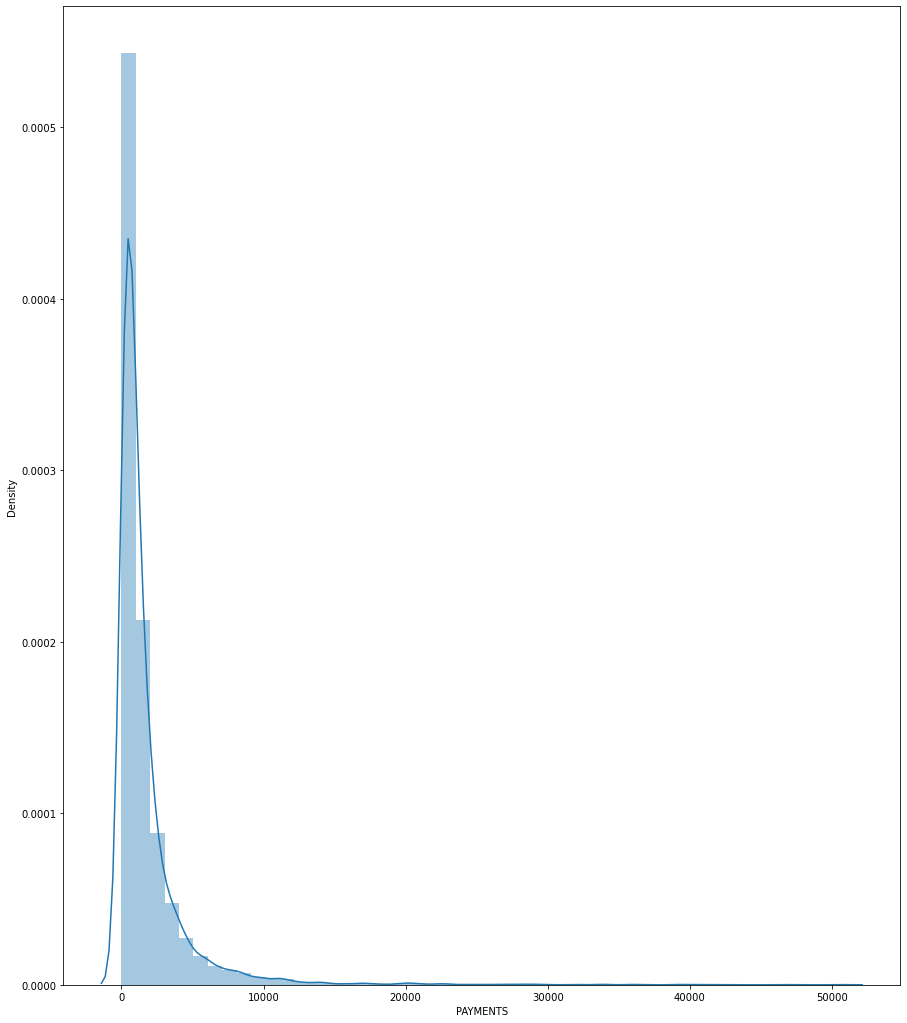

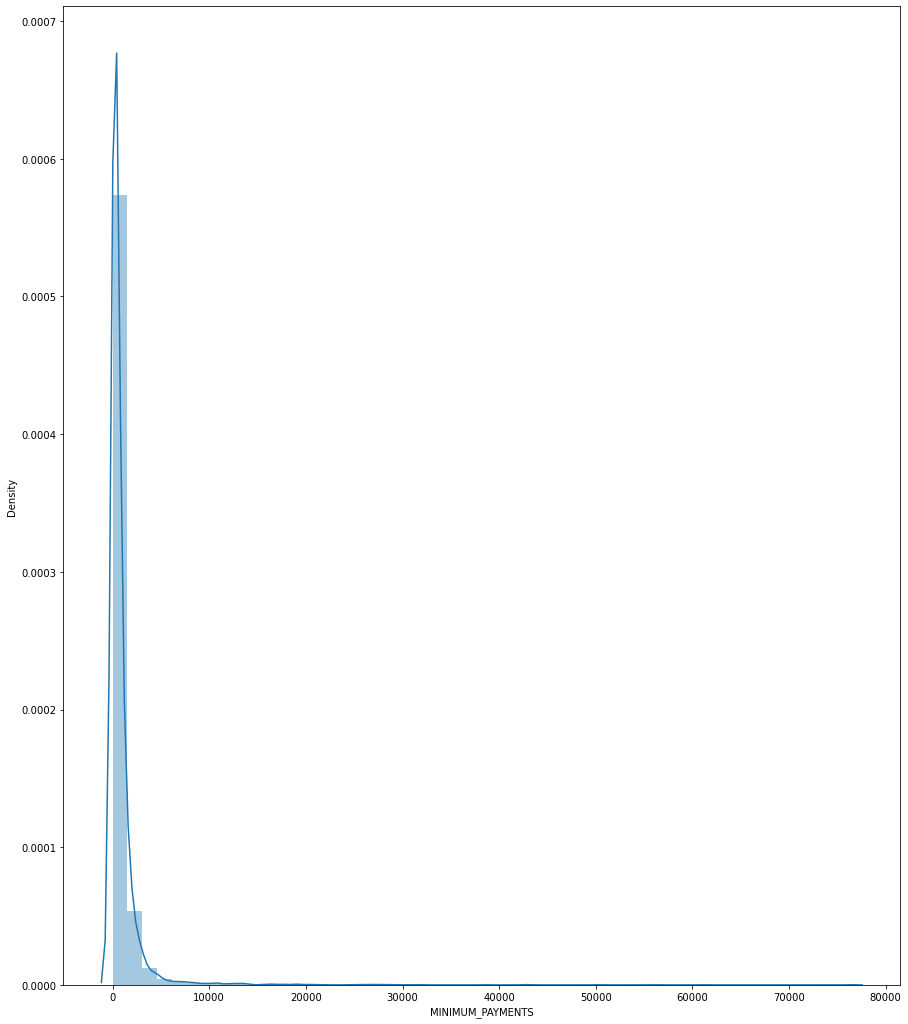

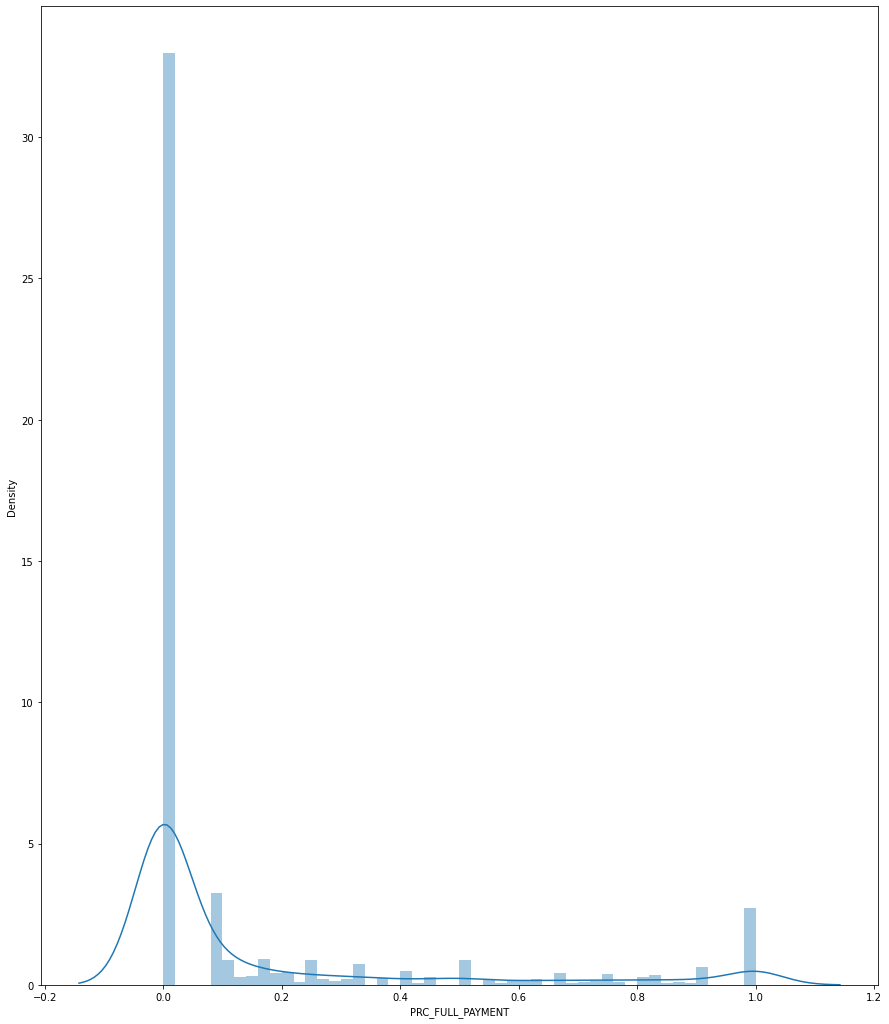

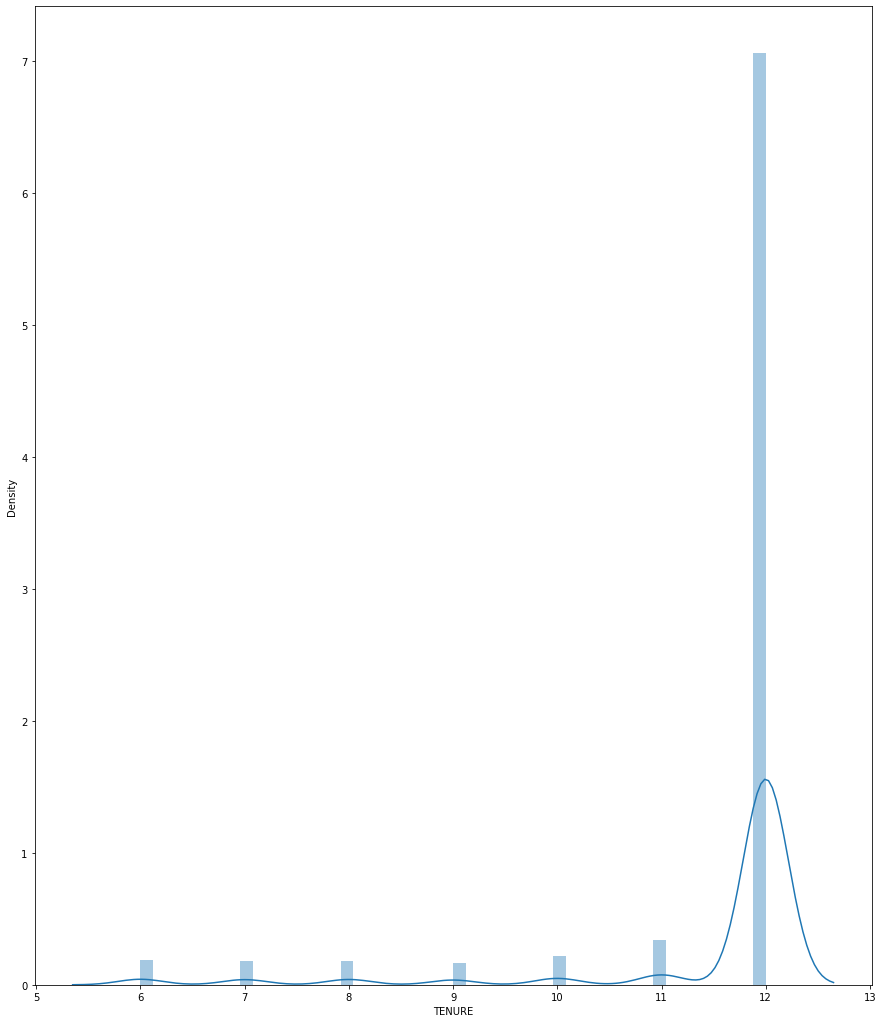

In [59]:
#Plot data separately


for i in range(1,18):
    plt.rcParams['figure.figsize'] =(15,18)
    #ax = plt.subplot(1,1,1)
    col = raw_data.columns[i]
    sns.distplot(raw_data[col]) #ax=ax)
    plot_name = './images/'+col+'.jpg'
    plt.savefig(plot_name)
    plt.show()
    

In [16]:
"""
Define the features desired to keep, two group of features (in different scale) available:
1. Absolute amount in dollar
2. Rating of frequency \in R([0,1])
""" 

features = raw_data.columns

#Here are the features related to the absolute amount of money
#Some of them can be used as LABEL
ft_basic =['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
# the last one is the percent of full payment being paid
# ft_basic_keep = ft_basic[:]

#Here are the features related to the frequency
ft_freq= ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

#Here are the features haven't been used
ft_unused = set(list(features))-set(ft_basic)-set(ft_freq)

print('Here are the features related to $$:\n', ft_basic,'\n')
print('Here are the features related to frequency: \n',ft_freq,'\n')
print('Here are the features not used: \n', ft_unused)

Here are the features related to $$:
 ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 

Here are the features related to frequency: 
 ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'] 

Here are the features not used: 
 {'PURCHASES_TRX', 'CUST_ID', 'TENURE', 'CASH_ADVANCE_TRX'}


In [21]:
"""
Clean the Data: Here we identify rows with missing fields in the desired categories. First, nan/None type is filtered and 
the row number is added to a list of rows which will be skipped when reading in the data for processing
"""

#Iterate over the list of desired features to keep. 

rows_nan = list()

#This is an iterative approach by collecting drop-indices from 
#each feature column- this can likely be done across the whole array simultaneously 

for feature in ft_kept:
    feature_series = data[feature]
    missing_bool = feature_series.isnull()
    nan_indices = feature_series.index[missing_bool]
    if not nan_indices.empty:
        print("Issue Feature:\n", feature,'\n', nan_indices, '\n Num of null=', len(nan_indices), '\n\n')
        rows_nan += list(nan_indices)
        print('Here are Nan Indices:', nan_indices)

#Eliminate duplicates and sort 
rows_nan = list(set(rows_nan))
rows_nan.sort()

# Get rid of rows containing null or empty
data_clean = data.drop(rows_nan)

#Check the number of resulting data points 
print('Here is shape of original data:',data.shape,'\n\n')
print('Here is shape of the clean data:', data_clean.shape,'\n Number of Removed Instances =',len(rows_nan))

Issue Feature:
 CREDIT_LIMIT 
 Int64Index([5203], dtype='int64') 
 Num of null= 1 


Here are Nan Indices: Int64Index([5203], dtype='int64')
Issue Feature:
 MINIMUM_PAYMENTS 
 Int64Index([   3,   45,   47,   54,   55,   56,   63,   93,   94,   97,
            ...
            8753, 8755, 8803, 8838, 8854, 8919, 8929, 8935, 8944, 8946],
           dtype='int64', length=313) 
 Num of null= 313 


Here are Nan Indices: Int64Index([   3,   45,   47,   54,   55,   56,   63,   93,   94,   97,
            ...
            8753, 8755, 8803, 8838, 8854, 8919, 8929, 8935, 8944, 8946],
           dtype='int64', length=313)
Here is shape of original data: (8950, 9) 


Here is shape of the clean data: (8636, 9) 
 Number of Removed Instances = 314


In [18]:
"""
Subset the Raw Data: Here, we refine data according to the desired features to keep defined in the previous cell. Then
we type convert the columns in order to actually apply clustering to them. 
"""

data = raw_data[ft_basic]
ft_kept = data.columns
data.head(10)

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,0.00,95.40,0.000000,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.00,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,773.17,773.17,0.00,0.000000,7500.0,622.066742,627.284787,0.000000
3,1666.670542,1499.00,1499.00,0.00,205.788017,7500.0,0.000000,NaN,0.000000
4,817.714335,16.00,16.00,0.00,0.000000,1200.0,678.334763,244.791237,0.000000
5,1809.828751,1333.28,0.00,1333.28,0.000000,1800.0,1400.057770,2407.246035,0.000000
6,627.260806,7091.01,6402.63,688.38,0.000000,13500.0,6354.314328,198.065894,1.000000
7,1823.652743,436.20,0.00,436.20,0.000000,2300.0,679.065082,532.033990,0.000000
8,1014.926473,861.49,661.49,200.00,0.000000,7000.0,688.278568,311.963409,0.000000
9,152.225975,1281.60,1281.60,0.00,0.000000,11000.0,1164.770591,100.302262,0.000000


In [23]:
"""
Functionalize code for cleaning data 
"""

def make_clean_data(pd_data):
    """
    -Given any dataframe, removes rows with nan or none, examining 
    feature by feature 
    -This probably can be done by doing the whole dataframe simultaneously 
    """
    #infer the features we have kept by checking columns of the input dataframe
    
    #Needed: check all features for missing values and remove everybody with missing. 
    #check remaining percentage 
    
    features = pd_data.columns 
    missing_dict = dict()
    bad_rows = list()
    for ft in features:
        feature_series = pd_data[ft]
        missing_bool = feature_series.isnull()
        bad_indices = feature_series.index[missing_bool]
        #Calculate the percentage of that feature which was True under .isnull()
        missing_dict[ft] = 100*float(np.sum(missing_bool)/feature_series.shape[0])
        
        if not bad_indices.empty:
            print("Issue Feature:\n", ft,'\n', bad_indices, '\n Num of null=', len(bad_indices), '\n\n')
            bad_rows += list(bad_indices)
            print('Here are Nan Indices:', bad_indices)
            
    #Total percentage(s) of data removed
    print('Number of Removed Row Instances = \n',bad_rows,'\n ')
    print('Percentage of Removed Features = \n',missing_dict)
    #Eliminate duplicates and sort 
    bad_rows = list(set(bad_rows))
    bad_rows.sort()

    # Get rid of rows containing null or empty
    clean_data = pd_data.drop(bad_rows)

    #Check the number of resulting data points 
    print('Here is shape of original data:',data.shape,'\n\n')
    print('Here is shape of the clean data:', data_clean.shape,'\n Number of Removed Instances =',len(bad_rows))
    return clean_data, missing_dict, bad_rows

clean_data ,_,__ = make_clean_data(data)

first_data_clean.index
print(type(first_data_clean.index),type(data_clean.index))

Issue Feature:
 CREDIT_LIMIT 
 Int64Index([5203], dtype='int64') 
 Num of null= 1 


Here are Nan Indices: Int64Index([5203], dtype='int64')
Issue Feature:
 MINIMUM_PAYMENTS 
 Int64Index([   3,   45,   47,   54,   55,   56,   63,   93,   94,   97,
            ...
            8753, 8755, 8803, 8838, 8854, 8919, 8929, 8935, 8944, 8946],
           dtype='int64', length=313) 
 Num of null= 313 


Here are Nan Indices: Int64Index([   3,   45,   47,   54,   55,   56,   63,   93,   94,   97,
            ...
            8753, 8755, 8803, 8838, 8854, 8919, 8929, 8935, 8944, 8946],
           dtype='int64', length=313)
Number of Removed Row Instances = 
 [5203, 3, 45, 47, 54, 55, 56, 63, 93, 94, 97, 99, 103, 111, 121, 129, 130, 142, 146, 156, 176, 181, 183, 188, 191, 215, 235, 240, 277, 309, 312, 319, 353, 372, 404, 406, 412, 422, 517, 573, 654, 667, 773, 782, 788, 796, 805, 818, 833, 840, 846, 852, 859, 860, 867, 868, 875, 877, 878, 891, 892, 905, 920, 923, 924, 931, 933, 948, 950, 957, 969, 9

In [72]:

CLEAN_DATA_DIR = './clean_data'

CLEAN_DATA_FILE = '/clean_credit_data.csv'

CLEAN_DATA_PATH = CLEAN_DATA_DIR + CLEAN_DATA_FILE

data_clean.to_csv(CLEAN_DATA_PATH) 


In [8]:
"""
Here we create a clusterable dataset by converting into Numpy array.
We also additionally extract one feature to be used as label
Return: X: (NxD) data ready to be clustered
        y: (Nx1) categorical label to examine clusters
"""

"""
?????????????????? Will Question: why are we removing any features? We can leave them in for the clustering. 
"""

# specify one label from clean data feature
ft_label = 'CREDIT_LIMIT'
assert ft_label in ft_kept, "Label feature not in features being used"

# the remaining are the real data feature
ft_data = list(ft_kept).copy()
ft_data.remove(ft_label)
X = data_clean[ft_data].values.astype(np.float64)
# label
y = data_clean[ft_label].values
"""
Further grouping needs to be done to convert into categorical label
"""

assert not np.any(np.isnan(X)), "Data contains NaN"
assert np.all(np.isfinite(X)), "Data contains +/-Inf"


In [55]:
# hyperparameter
N = X.shape[0] #number of data
d = X.shape[1] #dimension


In [64]:
"""
Pipeline for Kmeans clustering given input data X
"""
k = 10 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
center = kmeans.cluster_centers_
kmeans_label = kmeans.labels_

feature correspondence is 
 [(0, 'BALANCE'), (1, 'PURCHASES'), (2, 'ONEOFF_PURCHASES'), (3, 'INSTALLMENTS_PURCHASES'), (4, 'CASH_ADVANCE'), (5, 'PAYMENTS'), (6, 'MINIMUM_PAYMENTS'), (7, 'PRC_FULL_PAYMENT')]


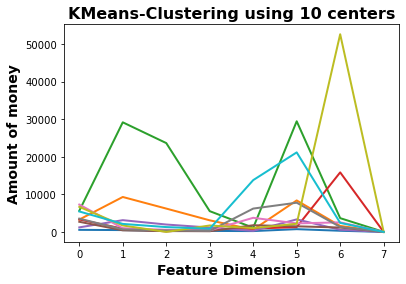

In [48]:
"""
Plotting clusters for KMeans
"""
%matplotlib inline
plt.figure(0)
plt.plot(np.tile(np.arange(d),(k,1)).T,center.T, linewidth = 2)
plt.xlabel('Feature Dimension', fontsize=14, fontweight='bold')
plt.ylabel('Amount of money',fontsize=14, fontweight='bold')
plt.title('KMeans-Clustering using {} centers'.format(k),fontsize=16, fontweight='bold')

print('feature correspondence is \n', [(i, feature) for (i, feature) in enumerate(ft_data)])

In [57]:
"""
Pipeline for GMM clustering given input data X
"""
gm = GaussianMixture(n_components=k, random_state=0).fit(X)
gm_center = gm.means_
gm_label = gm.labels_

feature correspondence is 
 [(0, 'BALANCE'), (1, 'PURCHASES'), (2, 'ONEOFF_PURCHASES'), (3, 'INSTALLMENTS_PURCHASES'), (4, 'CASH_ADVANCE'), (5, 'PAYMENTS'), (6, 'MINIMUM_PAYMENTS'), (7, 'PRC_FULL_PAYMENT')]


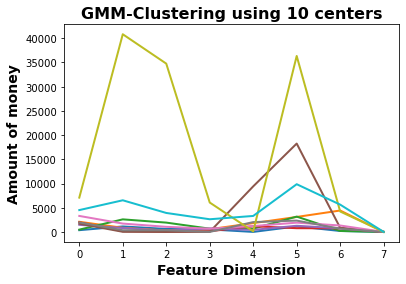

In [17]:
"""
Plotting clusters for GMM
"""
plt.figure(0)
plt.plot(np.tile(np.arange(d),(k,1)).T,gm_center.T, linewidth = 2)
plt.xlabel('Feature Dimension', fontsize=14, fontweight='bold')
plt.ylabel('Amount of money',fontsize=14, fontweight='bold')
plt.title('GMM-Clustering using {} centers'.format(k),fontsize=16, fontweight='bold')
print('feature correspondence is \n', [(i, feature) for (i, feature) in enumerate(ft_data)])


number in each bin is
 [4402 2006 1300  569  210  107   32    6    1    3]


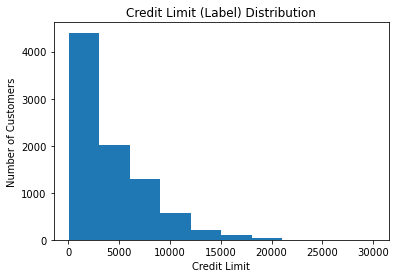

In [29]:
plt.hist(y, bins=10)
plt.title('Credit Limit (Label) Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Customers')
print('number in each bin is\n', np.histogram(y,bins=10)[0])

Text(0, 0.5, 'Credit Limit')

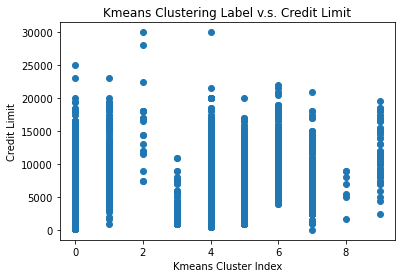

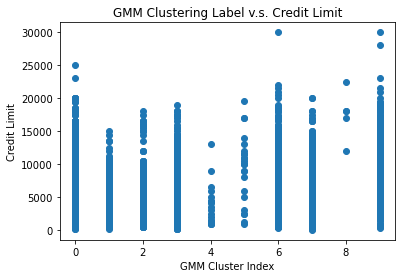

In [58]:
"""
The ideal case should be the Credit Limit is well-separated
according to the clustering indices.
This is in essence a visualization of the homogeneity&completeness metric
"""

plt.figure(1)
plt.scatter(kmeans_label, y)
plt.title('Kmeans Clustering Label v.s. Credit Limit')
plt.xlabel('Kmeans Cluster Index')
plt.ylabel('Credit Limit')

plt.figure(2)
plt.scatter(gm_label, y)
plt.title('GMM Clustering Label v.s. Credit Limit')
plt.xlabel('GMM Cluster Index')
plt.ylabel('Credit Limit')

In [66]:
"""
Here we implement the elbow method with different metric to find
the best number of clusters
"""

k_search = np.linspace(start=5, stop=100, num=20)
silh_score_kmeans = np.zeros(len(k_search))
CHindex_score_kmeans = silh_score_kmeans.copy()
DBindex_score_kmeans = silh_score_kmeans.copy()
SoS = silh_score_kmeans.copy()
for (i,k) in tqdm(enumerate(k_search), total=len(k_search)):
    kmeans = KMeans(n_clusters=int(k), random_state=0).fit(X)
    kmeans_label = kmeans.labels_
    SoS[i] = kmeans.inertia_
    silh_score_kmeans[i] = metrics.silhouette_score(X, kmeans_label, metric='euclidean')
    CHindex_score_kmeans[i] = metrics.calinski_harabasz_score(X,kmeans_label)
    DBindex_score_kmeans[i] = metrics.davies_bouldin_score(X,kmeans_label)


Text(0, 0.5, 'Davies-Bouldin Index¶')

<Figure size 432x288 with 0 Axes>

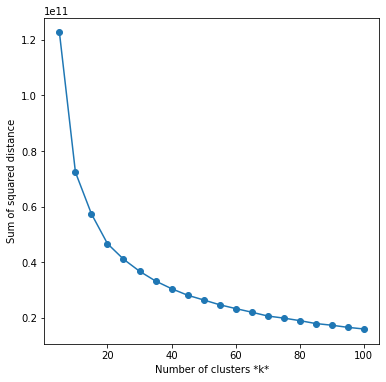

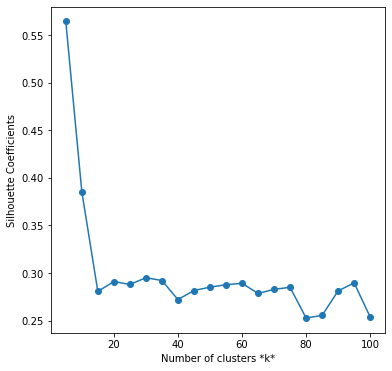

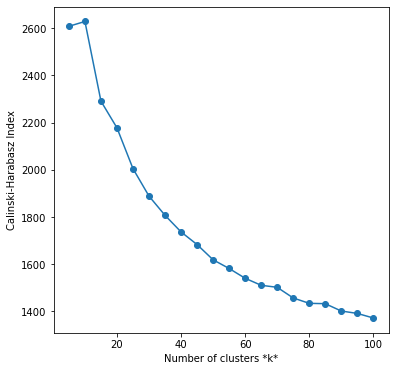

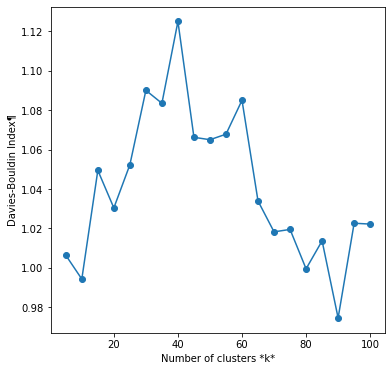

In [68]:
"""
Visualization of Elbow Methods for KMeans
"""
# SoS
plt.figure(0)
plt.figure(figsize=(6, 6))
plt.plot(k_search, SoS, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

# Silhouette
plt.figure(1)
plt.figure(figsize=(6, 6))
plt.plot(k_search, silh_score_kmeans, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette Coefficients')

# CH index
plt.figure(2)
plt.figure(figsize=(6, 6))
plt.plot(k_search, CHindex_score_kmeans, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Calinski-Harabasz Index')

# DB index
plt.figure(3)
plt.figure(figsize=(6, 6))
plt.plot(k_search, DBindex_score_kmeans, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Davies-Bouldin Index¶')

In [73]:
"""
Here we implement the elbow method with different metric to find
the best number of clusters
"""

k_search = np.linspace(start=5, stop=100, num=20)
silh_score_gm = np.zeros(len(k_search))
CHindex_score_gm = silh_score_gm.copy()
DBindex_score_gm = silh_score_gm.copy()
# with tqdm(total=total) as pbar:
#     for item in train_iter:
for (i,k) in tqdm(enumerate(k_search), total=len(k_search)):
    gm = GaussianMixture(n_components=int(k), random_state=0).fit(X)
    gm_label = gm.predict(X)

    silh_score_gm[i] = metrics.silhouette_score(X, gm_label, metric='euclidean')
    CHindex_score_gm[i] = metrics.calinski_harabasz_score(X,gm_label)
    DBindex_score_gm[i] = metrics.davies_bouldin_score(X,gm_label)

20it [01:24,  4.22s/it]


Text(0, 0.5, 'Davies-Bouldin Index¶')

<Figure size 432x288 with 0 Axes>

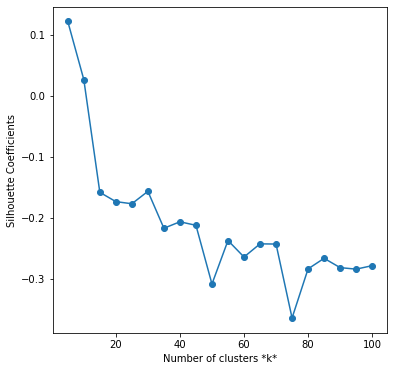

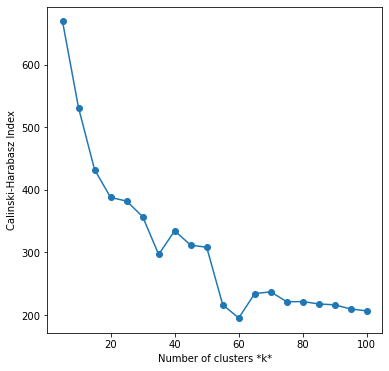

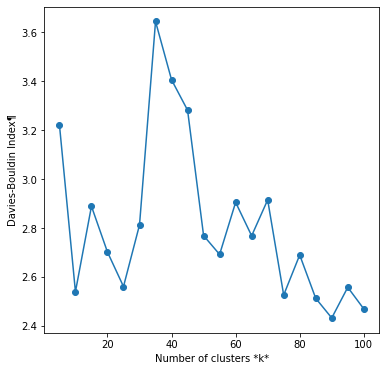

In [74]:
"""
Visualization of Elbow Methods for GMM
"""
# Silhouette
plt.figure(1)
plt.figure(figsize=(6, 6))
plt.plot(k_search, silh_score_gm, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette Coefficients')

# CH index
plt.figure(2)
plt.figure(figsize=(6, 6))
plt.plot(k_search, CHindex_score_gm, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Calinski-Harabasz Index')

# DB index
plt.figure(3)
plt.figure(figsize=(6, 6))
plt.plot(k_search, DBindex_score_gm, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Davies-Bouldin Index¶')